In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Datasets

In [2]:
# Load CIC 2018 datasets
cic_features = None
cic_labels = None

for file in list(glob.glob('/home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/*.csv')):
    print('Loading ', file, '...')
    reader = pd.read_csv(file, dtype=str, chunksize=10**6, skipinitialspace=True)  # Read in data from csv file

    for df in reader:
        features = df.drop(['Label'], axis=1)  # Separate label from features
        labels = df['Label']  # Save labels by themselves

        # Remove unused columns if present
        if 'Timestamp' in features:
            features = features.drop('Timestamp', axis=1)
        if 'Flow ID' in features:
            features = features.drop('Flow ID', axis=1)
        if 'Src IP' in features:
            features = features.drop('Src IP', axis=1)
        if 'Src Port' in features:
            features = features.drop('Src Port', axis=1)
        if 'Dst IP' in features:
            features = features.drop('Dst IP', axis=1)
            
        # Concatenate datasets
        if cic_features is None:
            cic_features = features
            cic_labels = labels
        else:
            cic_features = pd.concat([cic_features, features])
            cic_labels = pd.concat([cic_labels, labels])
            
cic_features = cic_features.loc[cic_features['Flow Duration'] != 'Flow Duration']  # Remove extra rows of column names
cic_features.head()

Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/02-15-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/03-01-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/02-23-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/03-02-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/02-22-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/02-16-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/02-14-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/02-28-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/02-20-2018.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/CIC-IDS2018/02-21-2018.csv ...


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0,112641158,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0266332489,56320579,704.2783540618,56321077,56320081,112641158,56320579,704.2783540618,56321077,56320081,0,0,0,0,0,0,0,0,0,0,0,0.0266332489,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56320579,704.2783540618,56321077,56320081
1,22,6,37366762,14,12,2168,2993,712,0,154.8571428571,254.8552702834,976,0,249.4166666667,395.9293918533,138.1173996291,0.6958055397,1494670.48,3894923.82123253,15617415,7,37366762,2874366.30769231,5104444.01922817,15617415,40,37366730,3396975.45454545,5564223.87220565,15936762,893,0,0,0,0,456,416,0.3746645214,0.3211410183,0,976,191.1481481481,320.1228975185,102478.66951567,0,0,0,1,0,0,0,0,0,198.5,154.8571428571,249.4166666667,0,0,0,0,0,0,14,2168,12,2993,29200,232,8,32,1024353,649038.754494676,1601183,321569,11431221,3644990.55984457,15617415,8960247
2,47514,6,543,2,0,64,0,64,0,32,45.2548339959,0,0,0,0,117863.720073665,3683.241252302,543,0,543,543,543,543,0,543,543,0,0,0,0,0,1,0,0,0,64,0,3683.241252302,0,0,64,42.6666666667,36.9504172281,1365.3333333333,0,1,0,0,1,0,0,0,0,64,32,0,0,0,0,0,0,0,2,64,0,0,244,-1,0,32,0,0,0,0,0,0,0,0
3,0,0,112640703,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0266333565,56320351.5,366.9884194358,56320611,56320092,112640703,56320351.5,366.9884194358,56320611,56320092,0,0,0,0,0,0,0,0,0,0,0,0.0266333565,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56320351.5,366.9884194358,56320611,56320092
4,0,0,112640874,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0266333161,56320437,719.8347032479,56320946,56319928,112640874,56320437,719.8347032479,56320946,56319928,0,0,0,0,0,0,0,0,0,0,0,0.0266333161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,0,0,0,0,56320437,719.8347032479,56320946,56319928


In [4]:
# Load USB 2021 datasets
usb_features = None
usb_labels = None

for file in list(glob.glob('/home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/*.csv')):
    print('Loading ', file, '...')
    reader = pd.read_csv(file, dtype=str, chunksize=10**6, skipinitialspace=True)  # Read in data from csv file

    for df in reader:
        features = df.drop(['Label'], axis=1)  # Separate label from features
        labels = df['Label']  # Save labels by themselves

        # Remove unused columns if present
        if 'Timestamp' in features:
            features = features.drop('Timestamp', axis=1)
        if 'Flow ID' in features:
            features = features.drop('Flow ID', axis=1)
        if 'Src IP' in features:
            features = features.drop('Src IP', axis=1)
        if 'Src Port' in features:
            features = features.drop('Src Port', axis=1)
        if 'Dst IP' in features:
            features = features.drop('Dst IP', axis=1)

        # Concatenate datasets
        if usb_features is None:
            usb_features = features
            usb_labels = labels
        else:
            usb_features = pd.concat([usb_features, features])
            usb_labels = pd.concat([usb_labels, labels])

usb_features.head()

Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/USB-IDS-1-VALIDATION.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/USB-IDS-1-TEST.csv ...
Loading  /home/chanel/Cyber/yang-summer-2022/data/USB-IDS2021/USB-IDS-1-TRAIN.csv ...


,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,6,16976,24,22,336.0,0.0,32.0,0.0,13.999999999999998,7.174835250343049,0.0,0.0,0.0,0.0,19792.648444863335,2709.7078228086707,377.24444444444447,645.2879609331422,2936.0,9.0,16976.0,738.0869565217392,809.6491334940024,2991.0,49.0,16887.0,804.1428571428572,827.7589193548014,3007.0,48.0,20,0,0,0,776,712,1413.760603204524,1295.947219604147,0.0,32.0,7.304347826086956,8.735291295066343,76.30531400966183,2,2,0,20,45,0,0,0,0.9166666666666666,7.304347826086956,14.0,0.0,336,20,22787,0,0,0,0,7,0,0,29200,227,20,32,0,0,0,0,0,0,0,0
1,80,6,619642,7,5,348.0,11192.0,348.0,0.0,49.71428571428571,131.53163660721108,5792.0,0.0,2238.4,2559.789991386012,18623.65688575016,19.36602102504349,56331.09090909091,126804.14919035934,354876.0,9.0,619642.0,103273.66666666666,162299.34504078157,354876.0,45.0,264519.0,66129.75,132090.8428074533,264266.0,46.0,1,1,0,0,232,168,11.296845597942037,8.069175427101454,0.0,5792.0,961.6666666666666,1913.7241813867124,3662340.242424242,1,2,1,2,11,0,0,0,0.7142857142857143,961.6666666666666,49.714285714285715,2238.4,0,0,0,0,0,0,0,29,0,932,29200,235,1,32,0,0,0,0,0,0,0,0
2,80,6,37978,6,4,344.0,11192.0,344.0,0.0,57.33333333333333,140.4374119195689,8688.0,0.0,2798.0,4100.249748490938,303754.80541366054,263.3103375638528,4219.777777777777,8420.797568784352,22795.0,11.0,37978.0,7595.6,10478.146964039013,22795.0,170.0,23370.0,7790.0,13175.71428803767,23004.0,173.0,1,1,0,0,200,136,157.98620253831166,105.32413502554111,0.0,8688.0,1153.6000000000004,2760.067760842919,7617974.0444444455,1,2,1,2,9,0,0,0,0.6666666666666666,1153.6,57.333333333333336,2798.0,0,0,0,0,0,0,0,34,0,1119,29200,235,1,32,0,0,0,0,0,0,0,0
3,80,6,188538,22,19,232.0,76487.0,78.0,0.0,10.545454545454547,27.163924382879358,7240.0,0.0,4025.631578947368,2707.9927008461927,406915.3168061611,217.46279264657522,4713.449999999999,15915.302845503838,74320.0,4.0,188538.0,8978.0,21781.028453679588,74320.0,4.0,188084.0,10449.111111111111,23045.62119665836,75083.0,4.0,3,8,0,0,724,616,116.68735215182085,100.77544049475436,0.0,7240.0,1871.1951219512198,2721.985701831589,7409206.160975608,2,2,0,11,40,0,0,0,0.8636363636363636,1871.1951219512196,10.545454545454545,4025.6315789473683,0,0,0,32657,7,2104459,0,5,0,1865,16060,227,3,32,0,0,0,0,0,0,0,0
4,80,6,118167,7,5,315.0,11192.0,315.0,0.0,45.0,119.05880899790658,5792.0,0.0,2238.4,2559.789991386012,97379.132922051,101.55119449592526,10742.454545454546,25187.699459711028,77726.0,10.0,118167.0,19694.5,32516.058166696654,77726.0,50.0,40184.0,10046.0,19914.078453864407,39917.0,47.0,1,1,0,0,232,168,59.23819678928974,42.31299770663553,0.0,5792.0,958.9166666666667,1914.7096365831146,3666112.9924242427,1,2,1,2,11,0,0,0,0.7142857142857143,958.9166666666666,45.0,2238.4,0,0,0,0,0,0,0,26,0,932,29200,235,1,32

## Get Statistical Measures (Numerical Features)

In [3]:
# Display CIC statistical summary
cic_numerical = cic_features.iloc[:,2:].astype(dtype=float)
cic_numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flow Duration,16232943.0,1.181380e+07,4.940124e+08,-9.190110e+11,492.000000,20970.000000,3.002116e+06,1.200000e+08
Tot Fwd Pkts,16232943.0,2.353319e+01,1.521137e+03,1.000000e+00,1.000000,2.000000,5.000000e+00,3.096290e+05
Tot Bwd Pkts,16232943.0,6.312706e+00,1.640256e+02,0.000000e+00,0.000000,1.000000,4.000000e+00,1.231180e+05
TotLen Fwd Pkts,16232943.0,9.730373e+02,6.216906e+04,0.000000e+00,0.000000,43.000000,4.560000e+02,1.443918e+08
TotLen Bwd Pkts,16232943.0,4.730931e+03,2.344659e+05,0.000000e+00,0.000000,101.000000,5.820000e+02,1.563604e+08
Fwd Pkt Len Max,16232943.0,2.007620e+02,3.035091e+02,0.000000e+00,0.000000,40.000000,3.080000e+02,6.444000e+04
Fwd Pkt Len Min,16232943.0,1.107600e+01,2.422938e+01,0.000000e+00,0.000000,0.000000,2.900000e+01,1.460000e+03
Fwd Pkt Len Mean,16232943.0,5.031274e+01,6.050561e+01,0.000000e+00,0.000000,36.000000,6.740000e+01,1.652931e+04
Fwd Pkt Len Std,16232943.0,7.084147e+01,1.164407e+02,0.000000e+00,0.000000,0.000000,1.046196e+02,1.840158e+04
Bwd Pkt Len Max,16232943.0,3.501495e+02,4.974234e+02,0.000000e+00,0.000000,95.000000,4.880000e+02,6.516000e+04


In [5]:
# Display USB statistical summary
usb_numerical = usb_features.iloc[:,2:].astype(dtype=float)
usb_numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Flow Duration,4813395.0,1.813805e+06,8.784524e+06,9.0000,38287.000000,3.429560e+05,7.709200e+05,1.200000e+08
Total Fwd Packet,4813395.0,1.559166e+01,3.741599e+01,1.0000,7.000000,8.000000e+00,2.100000e+01,2.108000e+03
Total Bwd packets,4813395.0,1.616730e+01,6.509897e+01,0.0000,5.000000,6.000000e+00,1.800000e+01,3.793000e+03
Total Length of Fwd Packet,4813395.0,3.583565e+02,3.873011e+02,0.0000,336.000000,3.420000e+02,3.740000e+02,1.980800e+05
Total Length of Bwd Packet,4813395.0,2.697992e+04,1.736946e+05,0.0000,459.000000,1.119200e+04,1.119200e+04,9.847985e+06
Fwd Packet Length Max,4813395.0,2.605533e+02,1.491700e+02,0.0000,77.000000,3.390000e+02,3.720000e+02,1.443000e+03
Fwd Packet Length Min,4813395.0,2.098972e-01,7.347814e+00,0.0000,0.000000,0.000000e+00,0.000000e+00,6.560000e+02
Fwd Packet Length Mean,4813395.0,3.951555e+01,2.077013e+01,0.0000,15.272727,4.512500e+01,5.383333e+01,6.560000e+02
Fwd Packet Length Std,4813395.0,9.630952e+01,5.909872e+01,0.0000,15.906158,1.256667e+02,1.396209e+02,5.483888e+02
Bwd Packet Length Max,4813395.0,3.800716e+03,3.289637e+03,0.0000,459.000000,5.792000e+03,5.792000e+03,1.119200e+04


In [4]:
# View percentages of CIC outliers
q1 = cic_numerical.quantile(0.25)
q3 = cic_numerical.quantile(0.75)
iqr = q3 - q1
((cic_numerical < (q1 - 1.5 * iqr)) | (cic_numerical > (q3 + 1.5 * iqr))).sum() / cic_numerical.shape[0]

Flow Duration        0.152080
Tot Fwd Pkts         0.088828
Tot Bwd Pkts         0.079037
TotLen Fwd Pkts      0.112770
TotLen Bwd Pkts      0.187132
Fwd Pkt Len Max      0.065751
Fwd Pkt Len Min      0.006668
Fwd Pkt Len Mean     0.062311
Fwd Pkt Len Std      0.063798
Bwd Pkt Len Max      0.076227
Bwd Pkt Len Min      0.079956
Bwd Pkt Len Mean     0.045150
Bwd Pkt Len Std      0.041279
Flow Byts/s          0.159294
Flow Pkts/s          0.143040
Flow IAT Mean        0.199392
Flow IAT Std         0.164902
Flow IAT Max         0.215272
Flow IAT Min         0.175397
Fwd IAT Tot          0.154022
Fwd IAT Mean         0.189823
Fwd IAT Std          0.212735
Fwd IAT Max          0.193869
Fwd IAT Min          0.226471
Bwd IAT Tot          0.211920
Bwd IAT Mean         0.157925
Bwd IAT Std          0.230906
Bwd IAT Max          0.231359
Bwd IAT Min          0.222780
Fwd PSH Flags        0.043895
Bwd PSH Flags        0.000000
Fwd URG Flags        0.000164
Bwd URG Flags        0.000000
Fwd Header

In [ ]:
# View percentages of USB outliers
q1 = usb_numerical.quantile(0.25)
q3 = usb_numerical.quantile(0.75)
iqr = q3 - q1
((usb_numerical < (q1 - 1.5 * iqr)) | (usb_numerical > (q3 + 1.5 * iqr))).sum() / usb_numerical.shape[0]

## View Unique Protocols

In [5]:
# View CIC unique protocols
cic_features['Protocol'].unique()

array(['0', '6', '17'], dtype=object)

In [ ]:
# View USB unique protocols
usb_features['Protocol'].unique()

## View Destination Port Distribution

Text(0.5, 1.0, 'Destination Ports')

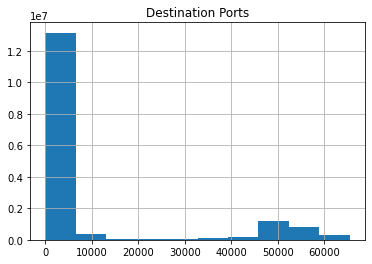

In [6]:
# View distribution of CIC destination ports
cic_features['Dst Port'].astype(dtype=int).hist()
plt.title('Destination Ports')

In [ ]:
# View distribution of USB destination ports
usb_features['Dst Port'].astype(dtype=int).hist()
plt.title('Destination Ports')

Text(0.5, 1.0, 'Top 10 Destination Ports')

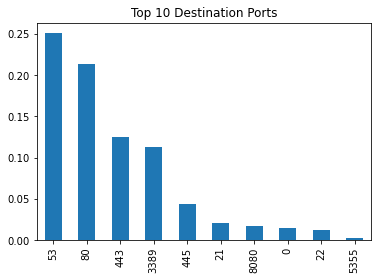

In [7]:
# View percentage distribution of top 10 CIC destination ports
top_10 = cic_features['Dst Port'].value_counts()[:10] / cic_features['Dst Port'].shape[0]
top_10.plot(kind='bar')
plt.title('Top 10 Destination Ports')

In [ ]:
# View percentage distribution of top 10 USB destination ports
top_10 = usb_features['Dst Port'].value_counts()[:10] / usb_features['Dst Port'].shape[0]
top_10.plot(kind='bar')
plt.title('Top 10 Destination Ports')